1. Face Detection

In [19]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
import cv2 as cvx

imx    =  't1.jpeg'
pixels = cvx.imread(imx)
# Source: https://github.com/opencv/opencv/tree/master/data/haarcascades
classifier = cvx.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cvx.cvtColor(pixels,cvx.COLOR_BGR2GRAY)
op = classifier.detectMultiScale(gray)
if len(op) == 0 :
    print("\n No face detected")
elif len(op) >= 1:
    print("\n Face Detected")


 No face detected


In [ ]:
classifier = cvx.CascadeClassifier('haarcascade_frontalface_default.xml')

2. Image Quality: Lower than 15 is best, anything less than 30 is fine and 30 to 100 is the poorest.

In [2]:
import imquality.brisque as brisque
import PIL.Image
imgx = 't2.jpeg'
img = PIL.Image.open(imgx)
brisque.score(img)

12.737436111036658

3. Image Super Res. Upscale:

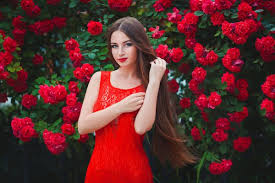

In [3]:
# https://idealo.github.io/image-super-resolution/
# https://github.com/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb
import numpy as np
from PIL import Image

img = Image.open(imgx)
img

In [10]:
type(img.size)

tuple

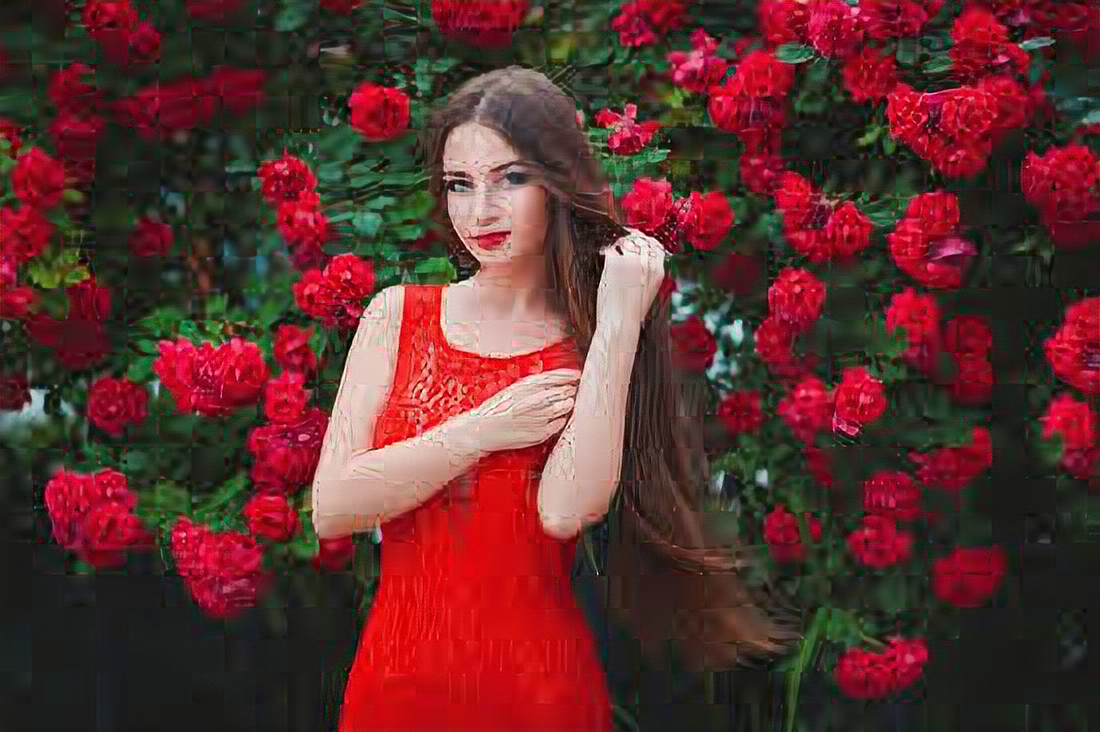

In [4]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')
sr_img = model.predict(np.array(img))
sresi = Image.fromarray(sr_img)
sresi

In [14]:
brisque.score(compressed_img)

13.700752101413599

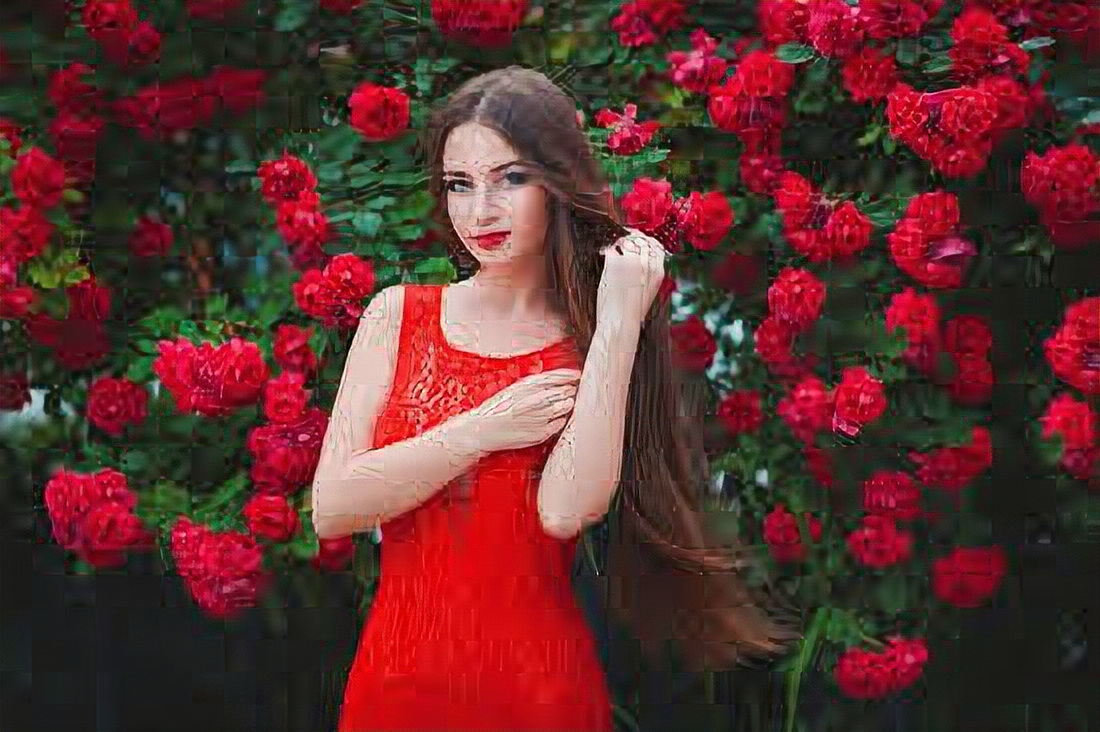

In [21]:
sresi.save('compressed.png','PNG', dpi=[300, 300], quality=100)
compressed_img = Image.open('compressed.jpeg')

compressed_img

4. Quality Score after Super Res:

In [5]:
brisque.score(sresi)

12.643178623264788

5. Person score:

In [ ]:
#CNN
# https://towardsdatascience.com/how-attractive-are-you-in-the-eyes-of-deep-neural-network-3d71c0755ccc

In [16]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(150, 150))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 150, 150, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img
# load an image and predict the class
def test_model(imx):
    # load the image
    img = load_image(imx)
    # load model
    model = load_model('final_model_BC.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

In [17]:
#Happy
test_model("t2.jpeg")

[31.503428]


In [18]:
#Sad has more number
test_model("sad.jpg")

[713.21136]
